## Classifiers comparison: decision trees and k-nearest neighbors on the dataset Iris


In the following program we compare the prediction results obtained by decision trees and k-nearest neighbors on the dataset Iris

The following cell shows the program training a decision tree and its results in preciction 

In [116]:
from sklearn import tree 
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score # will be used to separate training and test
import itertools
iris = load_iris()
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=300,min_samples_leaf=5,class_weight={0:1,1:1,2:1})
clf = clf.fit(iris.data, iris.target)
scores = cross_val_score(clf, iris.data, iris.target, cv=5) # score will be the accuracy
print(scores)


[0.96666667 1.         0.86666667 0.86666667 1.        ]


The following cell shows the training of k-nearest neighbors and its prediction results.
Here we use a uniform weighting setting (weights='uniform'): any neighbors weights the same in the majority voting aggregation.

In [ ]:
from sklearn import neighbors
n_neighbors = 11
clf_knn = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')
clf_knn = clf_knn.fit(iris.data, iris.target)
scores = cross_val_score(clf_knn, iris.data, iris.target, cv=5) # score will be the accuracy
print(scores)
# shows the model predictions  
for i in range(len(iris.target)):
    print(iris.data[i,:])
    print(iris.data[i,:].reshape(1,-1))
    instance=iris.data[i,:].reshape(1,-1)
    #print(clf_knn.predict(instance))
    predicted=clf_knn.predict(instance)[0]
    print(predicted)
    if iris.target[i]==predicted:
        print(str(i)+" ok "+str(iris.target_names[iris.target[i]]))
    else:
        print(str(i)+" nok "+"true class: "+str(iris.target_names[iris.target[i]])+"; predicted: "+str(iris.target_names[predicted]))

In the following cell we use a varying weighting setting (weights='distance'): any neighbors weights inversely with its distance to the test instance in the majority voting aggregation.

In [ ]:
n_neighbors = 11
clf_knn2 = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
clf_knn2.fit(iris.data, iris.target)

for i in range(len(iris.target)):
    instance=(iris.data[i,:]).reshape(1, -1)
    predicted2=clf_knn2.predict(instance)[0]
    if iris.target[i]==predicted2:
        print(str(i)+" ok "+str(iris.target_names[iris.target[i]]))
    else:
        print(str(i)+" nok "+"true class: "+str(iris.target_names[iris.target[i]])+"; predicted: "+str(iris.target_names[predicted]))
print("Classification score of k-nn with distance weighting")
scores2 = cross_val_score(clf_knn2, iris.data, iris.target, cv=5,scoring='accuracy') # score will be the accuracy
print(scores2)

The following cell shows the tuning of the k-nn models with a varying value of k (number of nearest neighbors) and finds the best value of k (giving the maximum accuracy).

C:\Users\Lorenzo\AppData\Local\Temp\ipykernel_12188\469533143.py:12: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  A=np.zeros(len(y_train), dtype=np.float) # for storing accuracies


k neighbors=1
accuracy=0.9166666666666666
k neighbors=2
accuracy=0.9166666666666666
k neighbors=3
accuracy=0.9333333333333333
k neighbors=4
accuracy=0.9166666666666666
k neighbors=5
accuracy=0.95
k neighbors=6
accuracy=0.9333333333333333
k neighbors=7
accuracy=0.9666666666666667
k neighbors=8
accuracy=0.9333333333333333
k neighbors=9
accuracy=0.9666666666666667
k neighbors=10
accuracy=0.9666666666666667
k neighbors=11
accuracy=0.9666666666666667
k neighbors=12
accuracy=0.9666666666666667
k neighbors=13
accuracy=0.9666666666666667
k neighbors=14
accuracy=0.95
k neighbors=15
accuracy=0.95
k neighbors=16
accuracy=0.9166666666666666
k neighbors=17
accuracy=0.9333333333333333
k neighbors=18
accuracy=0.9166666666666666
k neighbors=19
accuracy=0.9166666666666666
k neighbors=20
accuracy=0.9166666666666666
k neighbors=21
accuracy=0.9166666666666666
k neighbors=22
accuracy=0.9166666666666666
k neighbors=23
accuracy=0.9166666666666666
k neighbors=24
accuracy=0.9
k neighbors=25
accuracy=0.91666666

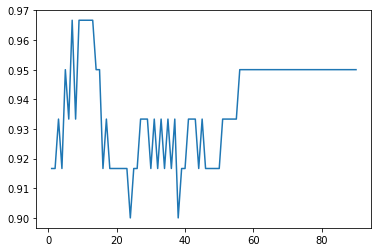

In [103]:
import numpy as np
from numpy import zeros
from sklearn import neighbors
from sklearn.datasets import load_iris
iris = load_iris()
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)

best_accuracy=0
best_k=1
A=np.zeros(len(y_train), dtype=np.float) # for storing accuracies
for n_neighbors in np.arange(1,len(y_train)+1):
    clf_knn3 = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
    # (n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=1, **kwargs)
    clf_knn3.fit(X_train, y_train)
    index=n_neighbors-1
    A[index]=clf_knn3.score(X_test, y_test)
    if best_accuracy<clf_knn3.score(X_test, y_test):
        best_accuracy=clf_knn3.score(X_test, y_test)
        best_k=n_neighbors
    print("k neighbors="+str(n_neighbors))
    print("accuracy="+str(clf_knn3.score(X_test, y_test)))
    
print("\n")
print("best k="+str(best_k))
print("best accuracy="+str(best_accuracy))

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

#plt.xticks(np.arange(1, len(y_train)+1, 8))
plt.yticks(np.arange(0.0,1.0,0.01))

plt.plot(np.arange(1,len(y_train)+1),A)

plt.show()

In the following cell we plot in the same plot two subplots with the diagrams on accuracy with the two kinds of weighting 
of the vote of the neighbours (uniform and with distance)

weighting:uniform


C:\Users\Lorenzo\AppData\Local\Temp\ipykernel_12188\3623873324.py:16: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  A=np.zeros(len(y_train), dtype=np.float) # for storing accuracies




best k=7
best accuracy=0.9666666666666667
weighting:distance


C:\Users\Lorenzo\AppData\Local\Temp\ipykernel_12188\3623873324.py:16: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  A=np.zeros(len(y_train), dtype=np.float) # for storing accuracies




best k=7
best accuracy=0.9666666666666667


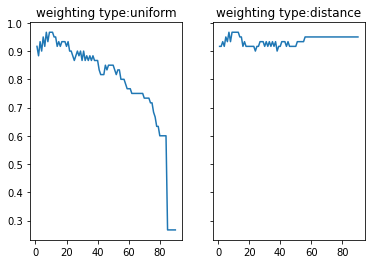

In [118]:
import numpy as np
from numpy import zeros
from sklearn import neighbors
from sklearn.datasets import load_iris
iris = load_iris()
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)

i=0  #parameter in the control of the subplot to draw on'
f,(ax1, ax2) = plt.subplots(1, 2, sharey=True)
for weight_type in ['uniform','distance']:
    print("weighting:"+str(weight_type))
    A=np.zeros(len(y_train), dtype=np.float) # for storing accuracies
    best_accuracy=0
    best_k=1
    for n_neighbors in np.arange(1,len(y_train)+1):
        clf_knn2 = neighbors.KNeighborsClassifier(n_neighbors, weights=weight_type)
        # (n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=1, **kwargs)
        clf_knn2.fit(X_train, y_train)
        index=n_neighbors-1
        A[index]=clf_knn2.score(X_test, y_test)
        if best_accuracy<clf_knn2.score(X_test, y_test):
            best_accuracy=clf_knn2.score(X_test, y_test)
            best_k=n_neighbors
        # print("k neighbors="+str(n_neighbors))
        # print("accuracy="+str(clf_knn2.score(X_test, y_test)))
    
    print("\n")
    print("best k="+str(best_k))
    print("best accuracy="+str(best_accuracy))
    if i==0:
        ax1.plot(np.arange(1,len(y_train)+1),A)
        ax1.set_title('weighting type:'+str(weight_type))
    else:
        ax2.plot(np.arange(1,len(y_train)+1),A)
        ax2.set_title('weighting type:'+str(weight_type))
    i=i+1

plt.show()


In the following cell we plot (overlapping) in the same picture both the diagrams on accuracy with the two kinds of weighting 
of the vote of the neighbours (uniform and with distance)

C:\Users\Lorenzo\AppData\Local\Temp\ipykernel_12188\1612611206.py:18: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  A=np.zeros((len(y_train),2), dtype=np.float) # 2 arrays for storing accuracies for each type of weigthing



 weighting:uniform
k neighbors=1
accuracy=0.9166666666666666
k neighbors=2
accuracy=0.8833333333333333
k neighbors=3
accuracy=0.9333333333333333
k neighbors=4
accuracy=0.9
k neighbors=5
accuracy=0.95
k neighbors=6
accuracy=0.9166666666666666
k neighbors=7
accuracy=0.9666666666666667
k neighbors=8
accuracy=0.9333333333333333
k neighbors=9
accuracy=0.9666666666666667
k neighbors=10
accuracy=0.9666666666666667
k neighbors=11
accuracy=0.9666666666666667
k neighbors=12
accuracy=0.95
k neighbors=13
accuracy=0.95
k neighbors=14
accuracy=0.9166666666666666
k neighbors=15
accuracy=0.9333333333333333
k neighbors=16
accuracy=0.9166666666666666
k neighbors=17
accuracy=0.9333333333333333
k neighbors=18
accuracy=0.9333333333333333
k neighbors=19
accuracy=0.9333333333333333
k neighbors=20
accuracy=0.9166666666666666
k neighbors=21
accuracy=0.9333333333333333
k neighbors=22
accuracy=0.9
k neighbors=23
accuracy=0.9
k neighbors=24
accuracy=0.8833333333333333
k neighbors=25
accuracy=0.8666666666666667
k

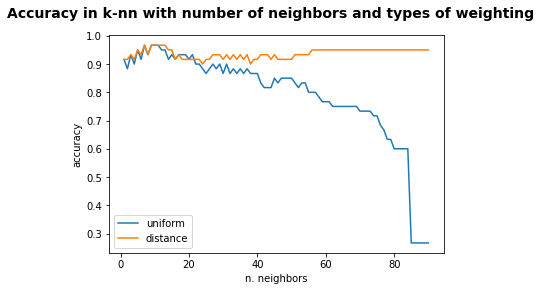

In [105]:
import numpy as np
from numpy import zeros
from sklearn import neighbors
from sklearn.datasets import load_iris
iris = load_iris()
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)

fig = plt.figure()
fig.suptitle('Accuracy in k-nn with number of neighbors and types of weighting', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)
ax.set_xlabel('n. neighbors')
ax.set_ylabel('accuracy')

A=np.zeros((len(y_train),2), dtype=np.float) # 2 arrays for storing accuracies for each type of weigthing
i=0  #parameter in the control of the different diagram (=matrix A column index)
best_accuracy=0
for weight_type in ['uniform','distance']:
    print("\n weighting:"+str(weight_type))
    best_accuracy=0
    best_k=1
    for n_neighbors in np.arange(1,len(y_train)+1):
        clf_knn2 = neighbors.KNeighborsClassifier(n_neighbors, weights=weight_type)
        # (n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=1, **kwargs)
        clf_knn2.fit(X_train, y_train)
        index=n_neighbors-1 # computes the matrix row index
        A[index,i]=clf_knn2.score(X_test, y_test)
        if best_accuracy<clf_knn2.score(X_test, y_test):
            best_accuracy=clf_knn2.score(X_test, y_test)
            best_k=n_neighbors
        # print("k neighbors="+str(n_neighbors))
        # print("accuracy="+str(clf_knn2.score(X_test, y_test)))
    
    print("\n")
    print("best k="+str(best_k))
    print("best accuracy="+str(best_accuracy))
    plt.plot(np.arange(1,len(y_train)+1),A[:,i])
    i=i+1
plt.legend(['uniform', 'distance'], loc='lower left')  
plt.show()


## 1) Show the scatter plot (in 2D, by choosing two of the four features) of the Iris data points, with a color determined by their class: red color for Setosa, blu for Versicolor, Green for Virginica.

In [106]:
X = iris.data
y = iris.target
palette = ['r', 'g', 'b']

def plot_dataset(x, y, labels, colors):
    plt.grid(True, alpha=0.4)
    plt.xlabel(labels[0])
    plt.ylabel(labels[1])
    plt.scatter(x, y, c=colors)

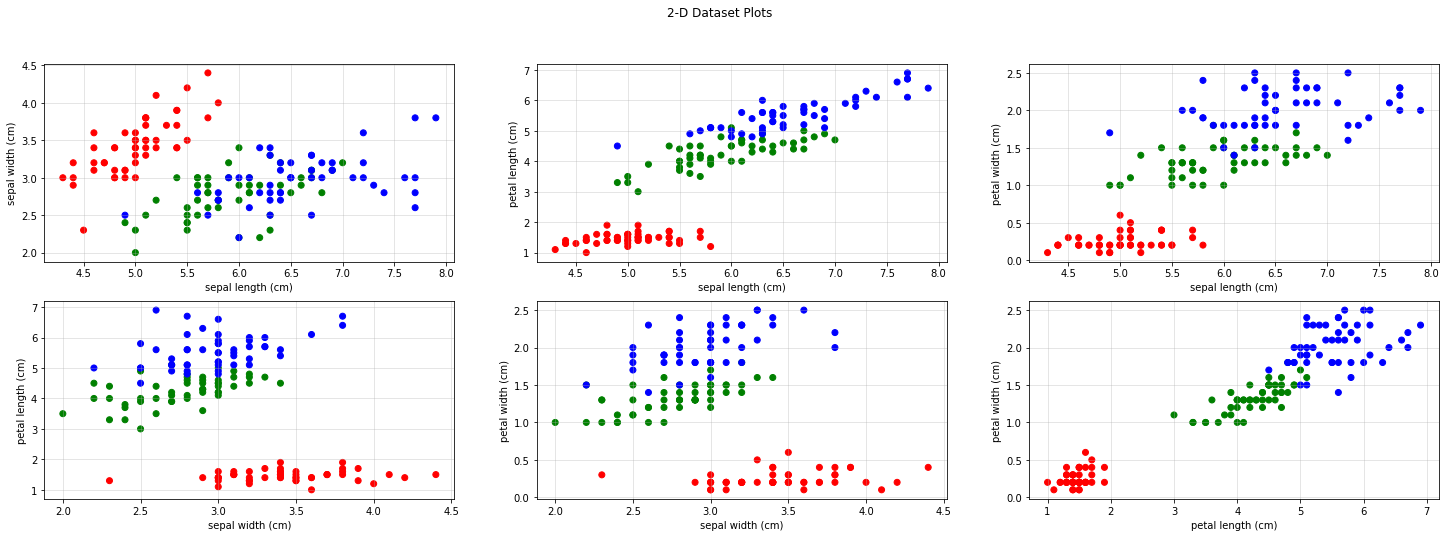

In [107]:
plt.figure(figsize=(25, 8))
plt.suptitle("2-D Dataset Plots")
colors = [palette[val] for val in iris.target]

combinations = itertools.combinations(range(len(iris.feature_names)), 2)
for index, combination in enumerate(combinations):
    plt.subplot(2, 3, index+1)

    labels = iris.feature_names[combination[0]], iris.feature_names[combination[1]]
    plot_dataset(X[:, combination[0]], X[:, combination[1]], labels, colors)

## 2) Show a similar scatter plot as in 1), but now the color of the dots is determined by the estimated class by the k-nn, with a chosen value of k of your choice.


In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=300)
n_neighbors = 7

knn_classifier = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knn_classifier = knn_classifier.fit(X_train, y_train)

prediction = knn_classifier.predict(X)
knn_classifier.score(X_test, y_test)

0.9666666666666667

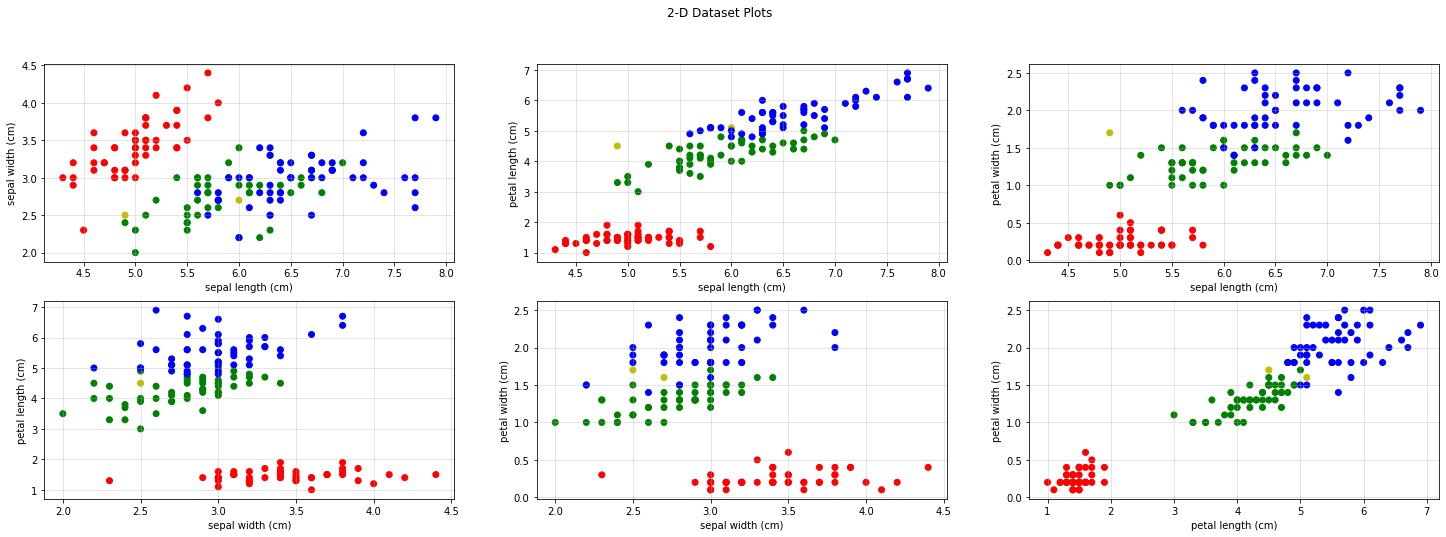

In [109]:
plt.figure(figsize=(25, 8))
plt.suptitle("2-D Dataset Plots")
colors = [palette[val] if prediction[i] == iris.target[i] else 'y' for i, val in enumerate(prediction)]

combinations = itertools.combinations(range(len(iris.feature_names)), 2)
for index, combination in enumerate(combinations):
    plt.subplot(2, 3, index+1)

    labels = iris.feature_names[combination[0]], iris.feature_names[combination[1]]
    plot_dataset(X[:, combination[0]], X[:, combination[1]], labels, colors)

### I tried using worse parameters to check the resulting performance and plot.

In [110]:
knn_classifier = neighbors.KNeighborsClassifier(80, weights='uniform')
knn_classifier = knn_classifier.fit(X_train, y_train)

prediction = knn_classifier.predict(X)
knn_classifier.score(X_test, y_test)

0.65

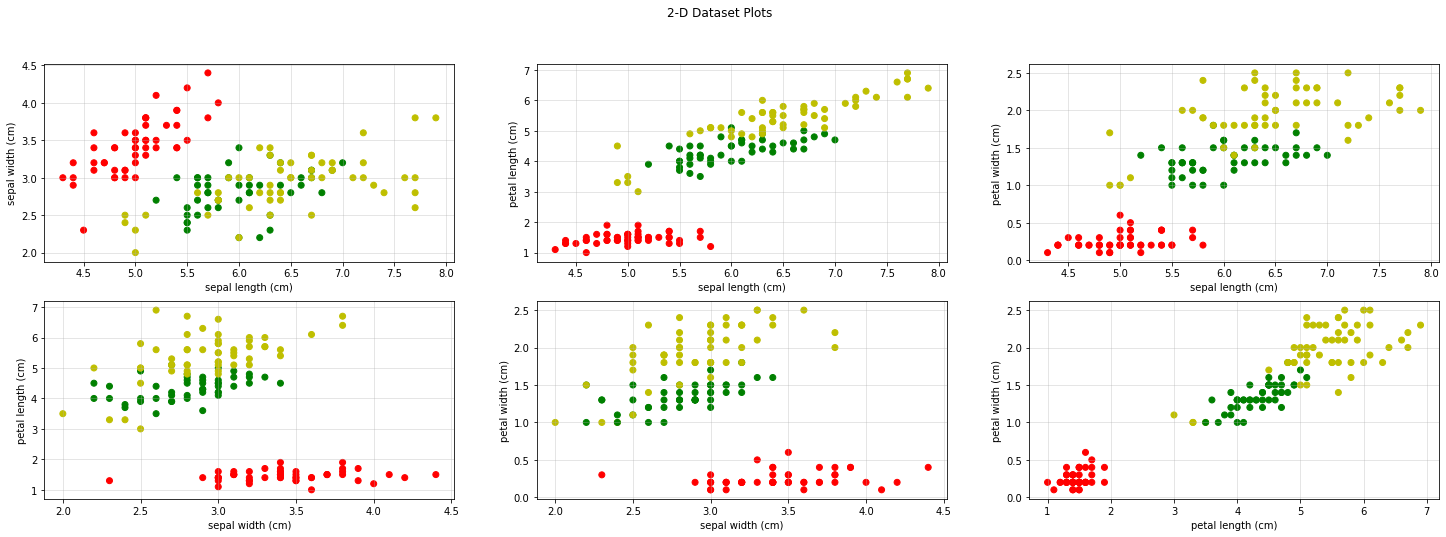

In [111]:
plt.figure(figsize=(25, 8))
plt.suptitle("2-D Dataset Plots")
colors = [palette[val] if prediction[i] == iris.target[i] else 'y' for i, val in enumerate(prediction)]

combinations = itertools.combinations(range(len(iris.feature_names)), 2)
for index, combination in enumerate(combinations):
    plt.subplot(2, 3, index+1)

    labels = iris.feature_names[combination[0]], iris.feature_names[combination[1]]
    plot_dataset(X[:, combination[0]], X[:, combination[1]], labels, colors)

## 3) Run k-nn and use now as a distance function between two data points x and y, the function: distance(x,y)= 1- k(x,y) 

With k(x,y) the Radial Basis Function (a Gaussian-like function) with the parameter gamma that controls its spread. 
The parameter gamma must be tuned to the best value, according to the maximum accuracy of k-nn (similarly as we did previously for the parameter n_neighbors). In this case, choose a value of k=7.

In [112]:
def radial_basis_function(x, y, gamma):
    def k(x, y, gamma):
        dist = np.linalg.norm(x - y)
        return np.exp(-dist/2*gamma**2)

    return 1 - k(x, y, gamma)

best_accuracy = 0
best_sigma = 0

# Tuning of sigma hyperparameter
for sigma in np.linspace(0, 1, 101):
    knn_classifier = neighbors.KNeighborsClassifier(n_neighbors, metric=radial_basis_function, metric_params={'gamma': sigma})
    knn_classifier = knn_classifier.fit(X_train, y_train)

    accuracy = knn_classifier.score(X_test, y_test)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_sigma = sigma

print(best_accuracy, best_sigma)

0.9666666666666667 0.01


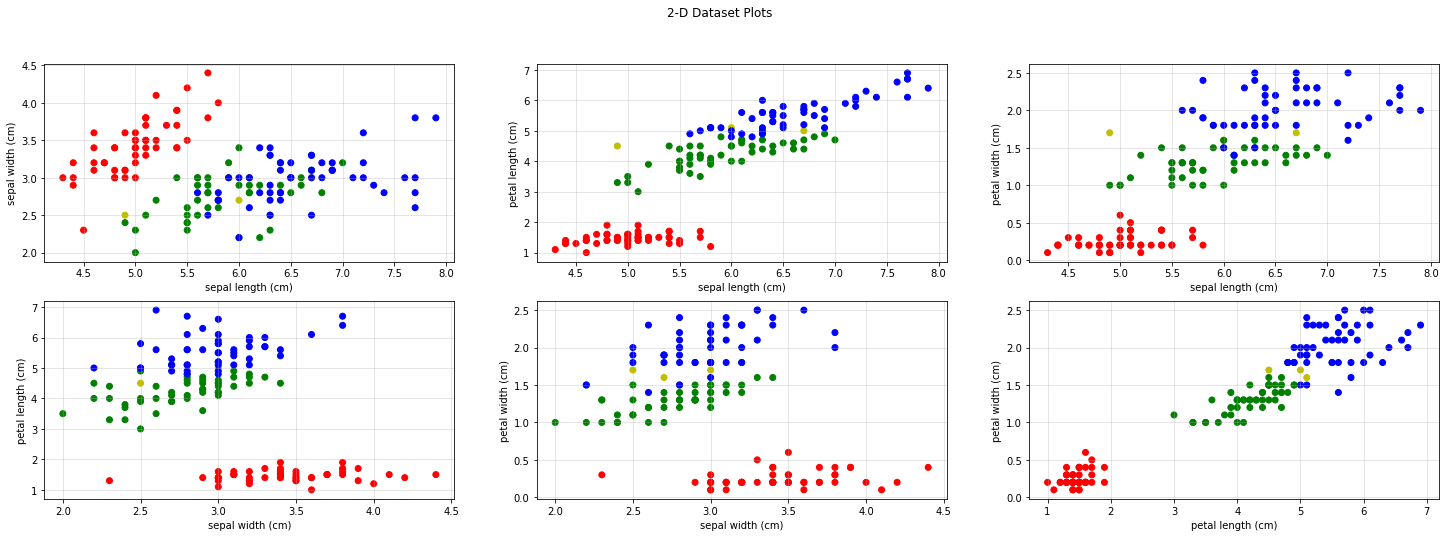

In [113]:
# We use 0.01 as gamma value as obtained from the previous tuning step
knn_classifier = neighbors.KNeighborsClassifier(n_neighbors, metric=radial_basis_function, metric_params={'gamma': 0.01})
knn_classifier = knn_classifier.fit(X_train, y_train)
prediction = knn_classifier.predict(X)

plt.figure(figsize=(25, 8))
plt.suptitle("2-D Dataset Plots")
colors = [palette[val] if prediction[i] == iris.target[i] else 'y' for i, val in enumerate(prediction)]

combinations = itertools.combinations(range(len(iris.feature_names)), 2)
for index, combination in enumerate(combinations):
    plt.subplot(2, 3, index+1)

    labels = iris.feature_names[combination[0]], iris.feature_names[combination[1]]
    plot_dataset(X[:, combination[0]], X[:, combination[1]], labels, colors)